### Importing basic libraries

In [1]:
import os
import zipfile
import pathlib

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-07-26 02:51:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 172.217.212.128, 172.253.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   130MB/s    in 3.8s    

2023-07-26 02:51:22 (132 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



### Importing data

In [3]:
zip=zipfile.ZipFile("/content/10_food_classes_all_data.zip")
zip.extractall()
zip.close()

### Exploring the data

In [4]:
for path,folder,filename in os.walk("/content/10_food_classes_all_data"):
  print(f"{len(filename)} in {path}")

0 in /content/10_food_classes_all_data
0 in /content/10_food_classes_all_data/test
250 in /content/10_food_classes_all_data/test/chicken_curry
250 in /content/10_food_classes_all_data/test/chicken_wings
250 in /content/10_food_classes_all_data/test/steak
250 in /content/10_food_classes_all_data/test/pizza
250 in /content/10_food_classes_all_data/test/grilled_salmon
250 in /content/10_food_classes_all_data/test/hamburger
250 in /content/10_food_classes_all_data/test/sushi
250 in /content/10_food_classes_all_data/test/fried_rice
250 in /content/10_food_classes_all_data/test/ramen
250 in /content/10_food_classes_all_data/test/ice_cream
0 in /content/10_food_classes_all_data/train
750 in /content/10_food_classes_all_data/train/chicken_curry
750 in /content/10_food_classes_all_data/train/chicken_wings
750 in /content/10_food_classes_all_data/train/steak
750 in /content/10_food_classes_all_data/train/pizza
750 in /content/10_food_classes_all_data/train/grilled_salmon
750 in /content/10_food_

There are 10 classes of food.
<br>750 in each class for training.
<br>250 in each class for testing

In [5]:
# checking the class names

path=pathlib.Path("/content/10_food_classes_all_data/train")
class_names=np.array([item.name for item in path.iterdir()])

In [6]:
class_names

array(['chicken_curry', 'chicken_wings', 'steak', 'pizza',
       'grilled_salmon', 'hamburger', 'sushi', 'fried_rice', 'ramen',
       'ice_cream'], dtype='<U14')

### Visualizing the data

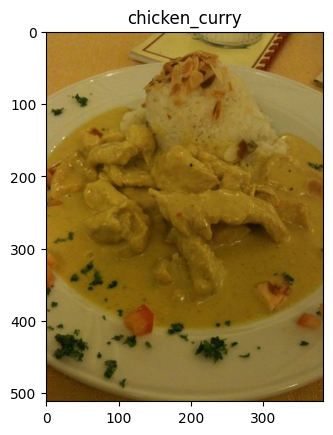

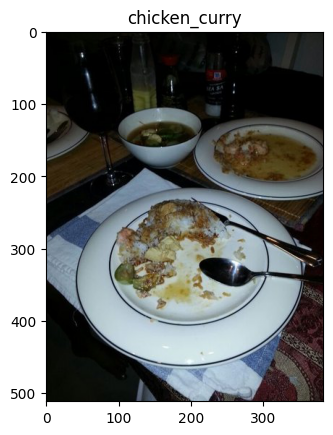

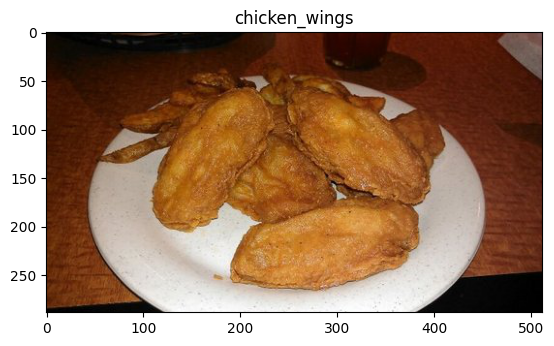

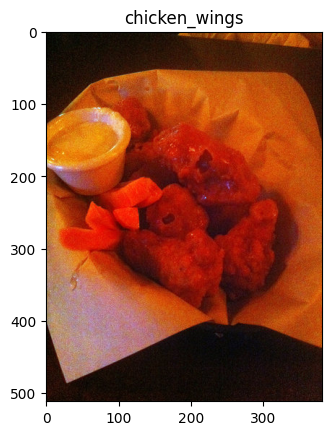

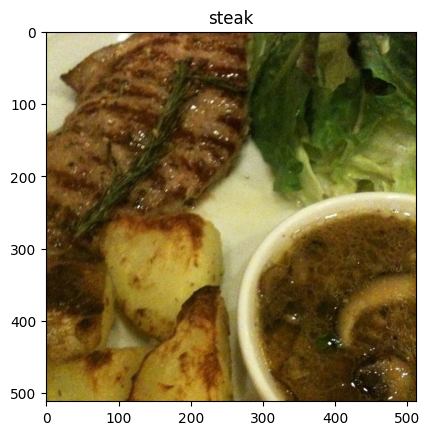

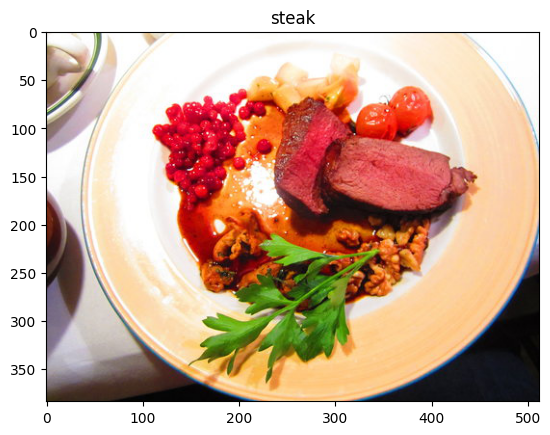

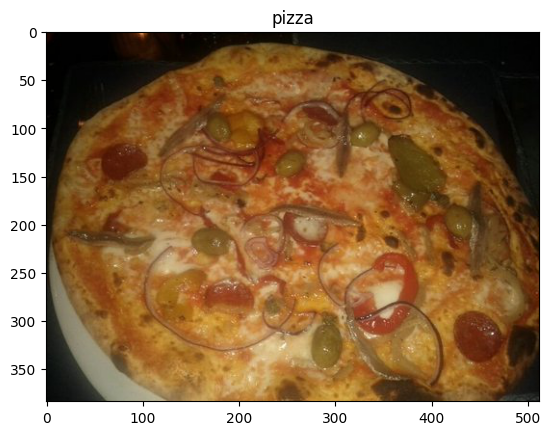

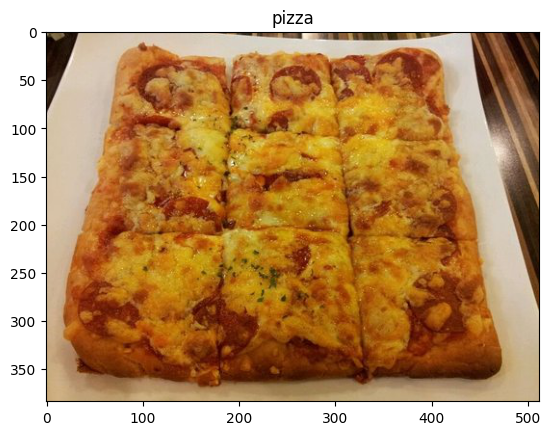

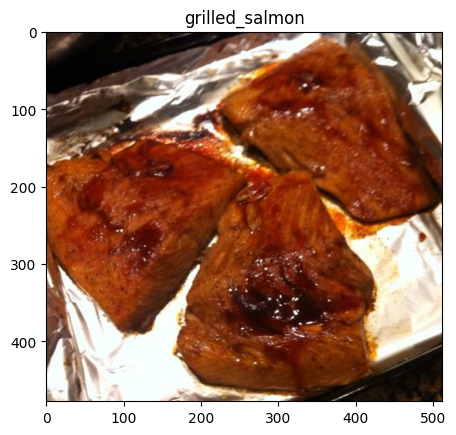

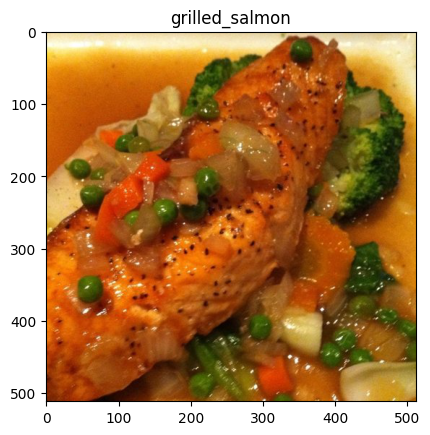

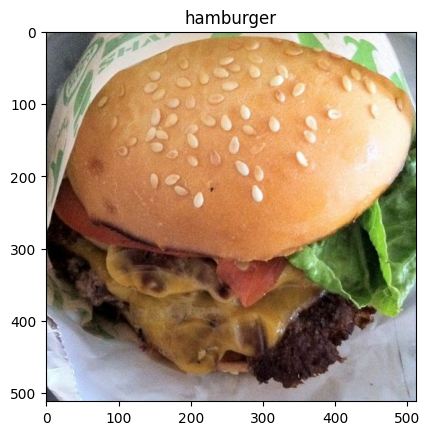

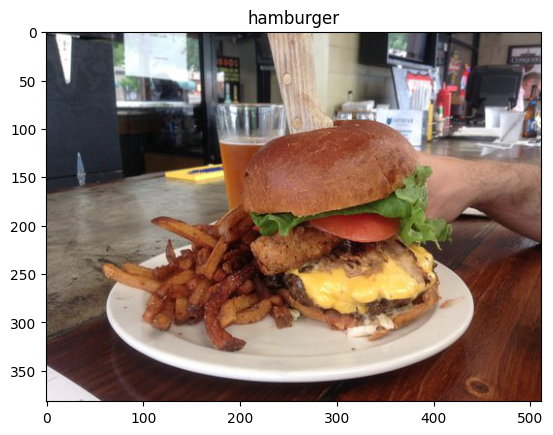

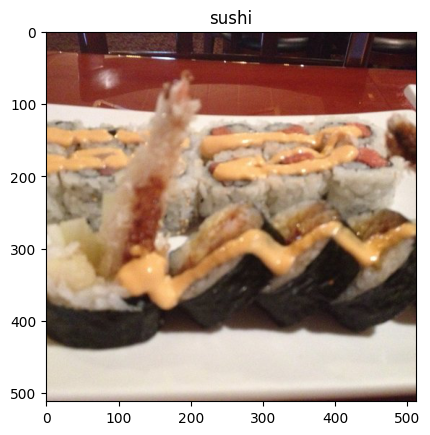

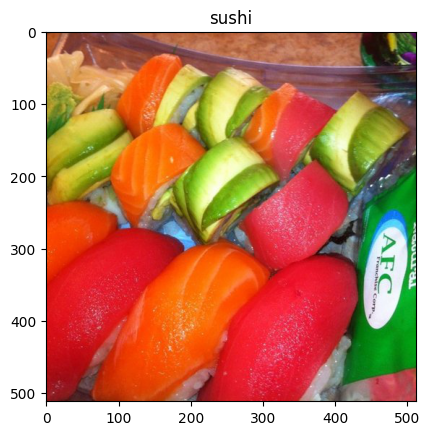

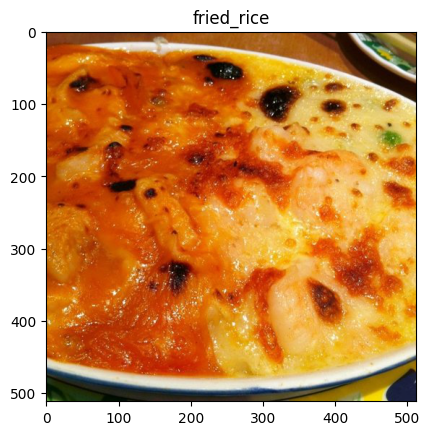

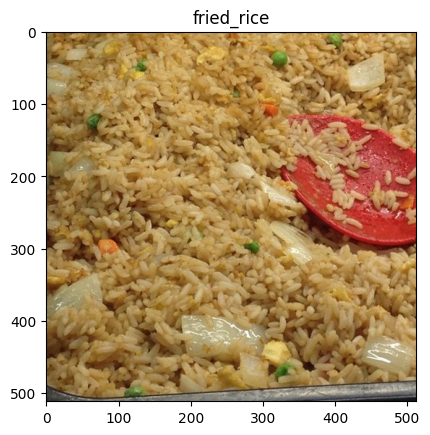

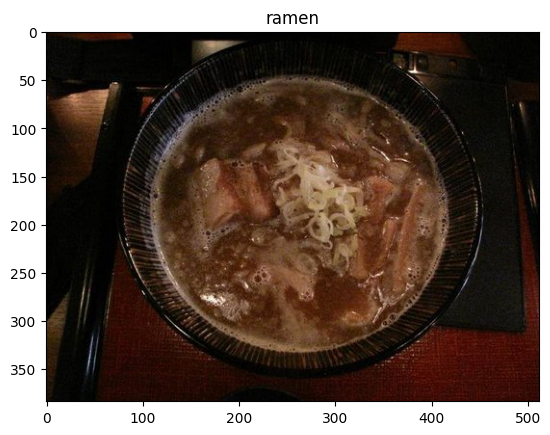

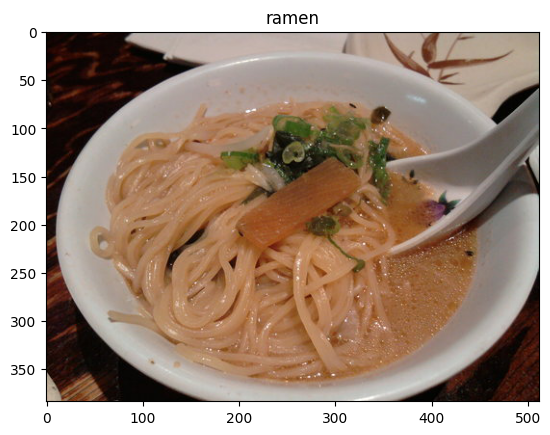

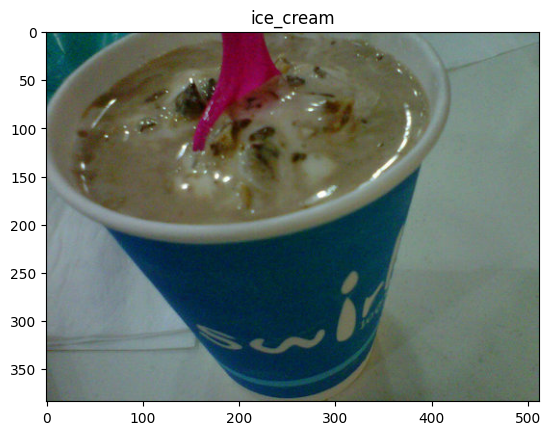

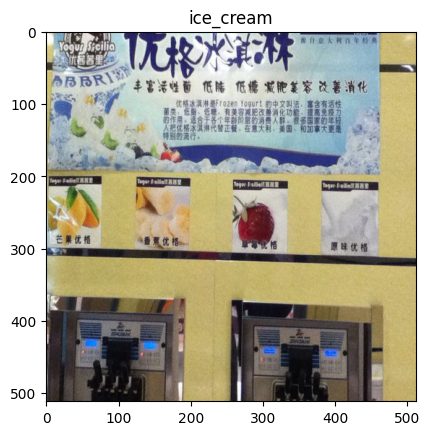

In [7]:
for i in class_names:
  pic=np.random.choice(os.listdir("/content/10_food_classes_all_data/train/"+i),2)
  for j in pic:
    pth="/content/10_food_classes_all_data/train/"+i+"/"+j
    img=mpimg.imread(pth)
    plt.imshow(img)
    plt.title(i)
    plt.show()

Images are not in same shape.
<br> Images of same classes are also not in same shape.

### Image Preprocessing

1. Converting images to numbers.
2. Making all images to same shape.
3. Scaling the values of pixel

In [8]:
# importing required libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# creating imagedatagenerator instance with scaling
train_data_scale=ImageDataGenerator(rescale=1/255)
test_data_scale=ImageDataGenerator(rescale=1/255)

In [10]:
#preprocessing image for model

train_data=train_data_scale.flow_from_directory("/content/10_food_classes_all_data/train",
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode="categorical")

test_data=train_data_scale.flow_from_directory("/content/10_food_classes_all_data/test",
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Model Building

In [11]:
baseline_model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 50)                7526450   
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 7,529,510
Trainable params: 7,529,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
# compiling the model
baseline_model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [14]:
# fitting the model
history_baseline= baseline_model.fit(train_data,
                        epochs=5,
                        validation_data=test_data,
                        )

Epoch 1/5
235/235 [==============================] - 56s 212ms/step - loss: 5.1392 - accuracy: 0.1004 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/5
235/235 [==============================] - 52s 220ms/step - loss: 2.3028 - accuracy: 0.0952 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/5
235/235 [==============================] - 51s 215ms/step - loss: 2.3028 - accuracy: 0.0963 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/5
235/235 [==============================] - 51s 217ms/step - loss: 2.3028 - accuracy: 0.0953 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
235/235 [==============================] - 51s 216ms/step - loss: 2.3029 - accuracy: 0.0912 - val_loss: 2.3026 - val_accuracy: 0.1000


In [15]:
#Building the model
model= tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="same"),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="same"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

In [17]:
# compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [18]:
# fitting the model
history_model= model.fit(train_data,
                        epochs=10,
                        validation_data=test_data,
                        )

Epoch 1/10
235/235 [==============================] - 60s 223ms/step - loss: 2.2052 - accuracy: 0.1747 - val_loss: 2.0220 - val_accuracy: 0.2764
Epoch 2/10
235/235 [==============================] - 53s 224ms/step - loss: 2.0120 - accuracy: 0.2833 - val_loss: 1.9315 - val_accuracy: 0.3120
Epoch 3/10
235/235 [==============================] - 60s 257ms/step - loss: 1.8815 - accuracy: 0.3465 - val_loss: 1.8625 - val_accuracy: 0.3560
Epoch 4/10
235/235 [==============================] - 51s 218ms/step - loss: 1.7810 - accuracy: 0.3848 - val_loss: 1.8433 - val_accuracy: 0.3584
Epoch 5/10
235/235 [==============================] - 61s 259ms/step - loss: 1.7063 - accuracy: 0.4167 - val_loss: 1.8026 - val_accuracy: 0.3808
Epoch 6/10
235/235 [==============================] - 51s 219ms/step - loss: 1.6190 - accuracy: 0.4460 - val_loss: 1.8268 - val_accuracy: 0.3684
Epoch 7/10
235/235 [==============================] - 61s 258ms/step - loss: 1.5678 - accuracy: 0.4696 - val_loss: 1.8242 - val_ac

The training accuracy is increasing but the validation accuracy is saturated.

The model is overfitting.
To overcome overfitting.
  * need more diverse data
  * reduce model complexity/ new model
  * make more data with given data

### Data Augmentation

In [19]:
model_aug=tf.keras.models.Sequential([tf.keras.layers.RandomFlip(),
                                     tf.keras.layers.RandomRotation((0.2,0.9))])

In [20]:
#train_data_augment=tf.image.random_flip_left_right(train_data)

In [21]:
model_aug= tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    model_aug,
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="same"),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="same"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation="softmax")
])

In [22]:
model_aug.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [24]:
history_model_aug= model_aug.fit(train_data,
                        epochs=10,
                        validation_data=test_data,
                        )

Epoch 1/10
235/235 [==============================] - 62s 264ms/step - loss: 1.7777 - accuracy: 0.3907 - val_loss: 1.7077 - val_accuracy: 0.4004
Epoch 2/10
235/235 [==============================] - 51s 216ms/step - loss: 1.7540 - accuracy: 0.3984 - val_loss: 1.6618 - val_accuracy: 0.4312
Epoch 3/10
235/235 [==============================] - 60s 255ms/step - loss: 1.7412 - accuracy: 0.3987 - val_loss: 1.6615 - val_accuracy: 0.4248
Epoch 4/10
235/235 [==============================] - 51s 216ms/step - loss: 1.7260 - accuracy: 0.4099 - val_loss: 1.6511 - val_accuracy: 0.4200
Epoch 5/10
235/235 [==============================] - 50s 215ms/step - loss: 1.7149 - accuracy: 0.4129 - val_loss: 1.6589 - val_accuracy: 0.4224
Epoch 6/10
235/235 [==============================] - 51s 215ms/step - loss: 1.6948 - accuracy: 0.4193 - val_loss: 1.7372 - val_accuracy: 0.3956
Epoch 7/10
235/235 [==============================] - 51s 219ms/step - loss: 1.6864 - accuracy: 0.4221 - val_loss: 1.6285 - val_ac

Data augmentation increased validation accuracy little bit.

Can increase the epoch and see what's happening or else use different model (can use transfer learning)